In [1]:
# Import the dependencies
import pandas as pd
import matplotlib as plt
import sklearn as skl
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import numpy as np

/Users/abigailwoolf/anaconda3/envs/PythonData/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/abigailwoolf/anaconda3/envs/PythonData/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/abigailwoolf/anaconda3/envs/PythonData/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/abigai

In [2]:
# Import the charity data
charity_df = pd.read_csv('charity_data.csv')
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


# Drop unnecessary columns

In [3]:
charity_df = charity_df.drop(columns=['EIN', 'NAME','APPLICATION_TYPE','SPECIAL_CONSIDERATIONS','CLASSIFICATION','INCOME_AMT','ASK_AMT'])
charity_df
# I dropped the columns that I did because they were either irrelevant EIN,NAME or
# I had difficulty manipulating the data, INCOME_AMT

,AFFILIATION,USE_CASE,ORGANIZATION,STATUS,IS_SUCCESSFUL
0,Independent,ProductDev,Association,1,1
1,Independent,Preservation,Co-operative,1,1
2,CompanySponsored,ProductDev,Association,1,0
3,CompanySponsored,Preservation,Trust,1,1
4,Independent,Heathcare,Trust,1,1
...,...,...,...,...,...
34294,Independent,ProductDev,Association,1,0
34295,CompanySponsored,ProductDev,Association,1,0
34296,CompanySponsored,Preservation,Association,1,0
34297,Independent,ProductDev,Association,1,1


# Inspect AFFILIFATION

In [4]:
# Inspect the value counts
affiliation_count = charity_df.AFFILIATION.value_counts()
affiliation_count

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

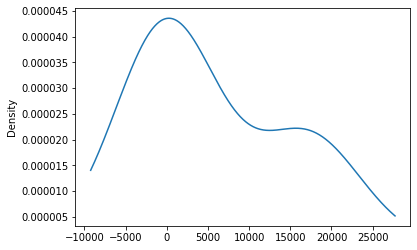

In [5]:
# Plot density
affiliation_count.plot.density()

In [6]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse = False)

# Fit the encoder and produce encoded DataFrame
enc_charity_df = pd.DataFrame(enc.fit_transform(charity_df.AFFILIATION.values.reshape(-1,1)))

# Rename the encoded columns
enc_charity_df.columns = enc.get_feature_names(['AFFILIATION'])
enc_charity_df.head()

,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
# Merge the two DataFrames together and drop the AFFILIATION column
charity_df = charity_df.merge(enc_charity_df,left_index=True,right_index=True).drop("AFFILIATION",1)
charity_df.head()

,USE_CASE,ORGANIZATION,STATUS,IS_SUCCESSFUL,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional
0,ProductDev,Association,1,1,0.0,0.0,1.0,0.0,0.0,0.0
1,Preservation,Co-operative,1,1,0.0,0.0,1.0,0.0,0.0,0.0
2,ProductDev,Association,1,0,1.0,0.0,0.0,0.0,0.0,0.0
3,Preservation,Trust,1,1,1.0,0.0,0.0,0.0,0.0,0.0
4,Heathcare,Trust,1,1,0.0,0.0,1.0,0.0,0.0,0.0


# Inspect USE_CASE

In [8]:
# Inspect the value counts
use_case_count = charity_df.USE_CASE.value_counts()
use_case_count

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

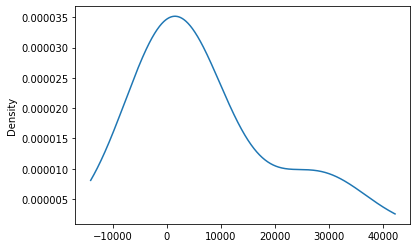

In [9]:
# Visualize density
use_case_count.plot.density()

In [10]:
# Determine which values to replace
replace_use_case = list(use_case_count[use_case_count <5000].index)

# Replace in DataFrame
for use_case in replace_use_case:
        charity_df.USE_CASE = charity_df.USE_CASE.replace(use_case, "other")
    
# Check to make sure binning was successful
charity_df.USE_CASE.value_counts()

Preservation    28095
ProductDev       5671
other             533
Name: USE_CASE, dtype: int64

In [11]:
# Fit the encoder and produce encoded DataFrame
enc_use_case_df = pd.DataFrame(enc.fit_transform(charity_df.USE_CASE.values.reshape(-1,1)))

# Rename the encoded columns
enc_use_case_df.columns = enc.get_feature_names(['USE_CASE'])
enc_use_case_df.head()

,USE_CASE_Preservation,USE_CASE_ProductDev,USE_CASE_other
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [12]:
# Merge the two DataFrames together and drop the USE_CASE column
charity_df = charity_df.merge(enc_use_case_df,left_index=True,right_index=True).drop("USE_CASE",1)
charity_df

,ORGANIZATION,STATUS,IS_SUCCESSFUL,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,USE_CASE_Preservation,USE_CASE_ProductDev,USE_CASE_other
0,Association,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Co-operative,1,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Association,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Trust,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Trust,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,Association,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,Association,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,Association,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34297,Association,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Inspect ORGANIZATION

In [13]:
# Inspect the value counts
organization_count = charity_df.ORGANIZATION.value_counts()
organization_count

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

In [14]:
# Determine which values to replace
replace_organization = list(organization_count[organization_count <10000].index)

# Replace in DataFrame
for organization in replace_organization:
        charity_df.ORGANIZATION = charity_df.ORGANIZATION.replace(organization, "other")
    
# Check to make sure binning was successful
charity_df.ORGANIZATION.value_counts()

Trust          23515
Association    10255
other            529
Name: ORGANIZATION, dtype: int64

In [15]:
# Fit the encoder and produce encoded DataFrame
enc_org_df = pd.DataFrame(enc.fit_transform(charity_df.ORGANIZATION.values.reshape(-1,1)))

# Rename the encoded columns
enc_org_df.columns = enc.get_feature_names(['ORGANIZATION'])
enc_org_df.head()

,ORGANIZATION_Association,ORGANIZATION_Trust,ORGANIZATION_other
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [16]:
# Merge the two DataFrames together and drop the USE_CASE column
charity_df = charity_df.merge(enc_org_df,left_index=True,right_index=True).drop("ORGANIZATION",1)
charity_df

,STATUS,IS_SUCCESSFUL,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,USE_CASE_Preservation,USE_CASE_ProductDev,USE_CASE_other,ORGANIZATION_Association,ORGANIZATION_Trust,ORGANIZATION_other
0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
34295,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
34296,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
34297,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


# Inspect ASK_AMT

In [17]:
# # Inspect the value counts
# ask_amt_count = charity_df.ASK_AMT.value_counts()
# ask_amt_count



5000       25398
10478          3
15583          3
6725           3
63981          3
           ...  
772556         1
70103          1
27096          1
25049          1
1138700        1
Name: ASK_AMT, Length: 8747, dtype: int64

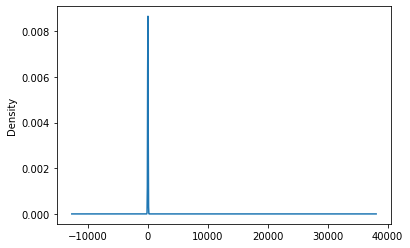

In [18]:
# ask_amt_count.plot.density()

In [19]:
# # Determine which values to replace
# replace_ask_amt = list(ask_amt_count[ask_amt_count < 25398].index)

# # Replace in DataFrame
# for ask_amt in replace_ask_amt:
#         charity_df.ASK_AMT = charity_df.ASK_AMT.replace(ask_amt, "other")
    
# # Check to make sure binning was successful
# charity_df.ASK_AMT.value_counts()


5000     25398
other     8901
Name: ASK_AMT, dtype: int64

In [20]:
# charity_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,USE_CASE_Preservation,USE_CASE_ProductDev,USE_CASE_other,ORGANIZATION_Association,ORGANIZATION_Trust,ORGANIZATION_other
0,1,5000,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1,other,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,5000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1,other,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,other,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [35]:
# # Change int data to str in order to encode it
# for i in charity_df['ASK_AMT']:
#     for 5000
#         print("High")

SyntaxError: invalid syntax (<ipython-input-35-39e7d7cf8ef7>, line 3)

In [24]:
# # Change the 5,000 dollar category to categorical data
# charity_df = charity_df.replace("5000","High",inplace= True)
# charity_df.head()


AttributeError: 'NoneType' object has no attribute 'replace'

In [ ]:
# # Create the OneHotEncoder instance
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(sparse=False)

# # Fit the encoder and produce encoded DataFrame
# encode_df = pd.DataFrame(enc.fit_transform(charity_df.ASK_AMT.values.reshape(-1,1)))

# # Rename encoded columns
# encode_df.columns = enc.get_feature_names(['ASK_AMT'])
# encode_df.head()

In [ ]:
# # Check the dataframe for scaling
# charity_df.head()

# Scale the data

In [17]:
# Standarize the numerical data
# Create stadard scaler instance
scaler = StandardScaler()

In [18]:
# Fit the data
scaler.fit(charity_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
# Scale the data
scaled_charity_data = scaler.transform(charity_df)

In [20]:
# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_charity_data, columns = charity_df.columns)
transformed_scaled_data.head()

,STATUS,IS_SUCCESSFUL,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,USE_CASE_Preservation,USE_CASE_ProductDev,USE_CASE_other,ORGANIZATION_Association,ORGANIZATION_Trust,ORGANIZATION_other
0,0.012075,0.937158,-0.919036,-0.043237,0.925206,-0.031033,-0.0108,-0.019472,-2.128034,2.246807,-0.125639,1.531213,-1.476667,-0.125159
1,0.012075,0.937158,-0.919036,-0.043237,0.925206,-0.031033,-0.0108,-0.019472,0.469917,-0.445076,-0.125639,-0.653077,-1.476667,7.989833
2,0.012075,-1.067056,1.088097,-0.043237,-1.080840,-0.031033,-0.0108,-0.019472,-2.128034,2.246807,-0.125639,1.531213,-1.476667,-0.125159
3,0.012075,0.937158,1.088097,-0.043237,-1.080840,-0.031033,-0.0108,-0.019472,0.469917,-0.445076,-0.125639,-0.653077,0.677201,-0.125159
4,0.012075,0.937158,-0.919036,-0.043237,0.925206,-0.031033,-0.0108,-0.019472,-2.128034,-0.445076,7.959324,-0.653077,0.677201,-0.125159


# Characterize the Data

In [ ]:
# Create training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=78
)

In [ ]:
# Create StandardScaler instance
scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Create the model 
nn_model = tf.keras.models.Sequential()

In [ ]:
# Compile the model to inform the model how it should learn and train
binary_crossentropy is used for  binary classification
adam wont get sttuck on weaker variables
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])